<a href="https://colab.research.google.com/github/NorahEkuttan/WEEK-8-IP/blob/main/WEEK_8_IP_NORAH_EKUTTAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MORINGA SCHOOL WEEK 8 INDEPENDENT PROJECT NORAH EKUTTAN

## 1. Defining the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### a) Specifying the Question


Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.



Part 2: SVM:

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

### b) Defining the Metric for Success

Successfully predict our model

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [5]:

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [6]:
# Loading the Dataset
# 
#
df = pd.read_csv('/content/hypothyroid (1).csv')
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


## 3. Checking the Data

In [7]:
# Determining the no. of records in our dataset
#
df.shape

(3163, 26)

In [8]:
# Previewing the top of our dataset
#
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [9]:
# Previewing the bottom of our dataset
# 
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [10]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [11]:
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [12]:
#checking for duplicates
df.duplicated().sum()


77

In [13]:
#dropping the duplicates
df =df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [15]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [16]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [17]:
df.TBG_measured.value_counts()

n    2835
y     251
Name: TBG_measured, dtype: int64

In [18]:
df.TBG.value_counts()

?       2835
21        13
25        13
23        13
28        13
20        12
30        11
31        11
19        10
29        10
33        10
26         9
27         9
32         9
17         8
16         8
38         7
36         7
18         7
34         6
35         5
110        5
22         4
40         4
108        4
39         4
37         4
14         3
24         3
41         2
53         2
43         2
13         2
15         2
47         1
7.30       1
48         1
0          1
86         1
45         1
52         1
63         1
9.30       1
8.40       1
69         1
3.10       1
80         1
65         1
11         1
50         1
12         1
122        1
8.50       1
Name: TBG, dtype: int64

In [19]:
df = df[df.sex !='?']

In [20]:
#label encoding our columns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['sex']=labelencoder.fit_transform(df['sex'])
df['on_thyroxine']=labelencoder.fit_transform(df['on_thyroxine'])
df['query_on_thyroxine']=labelencoder.fit_transform(df['query_on_thyroxine'])
df['on_antithyroid_medication']=labelencoder.fit_transform(df['on_antithyroid_medication'])
df['thyroid_surgery']=labelencoder.fit_transform(df['thyroid_surgery'])
df['query_hypothyroid']=labelencoder.fit_transform(df['query_hypothyroid'])
df['query_hyperthyroid']=labelencoder.fit_transform(df['query_hyperthyroid'])
df['pregnant']=labelencoder.fit_transform(df['pregnant'])
df['sick']=labelencoder.fit_transform(df['sick'])
df['tumor']=labelencoder.fit_transform(df['tumor'])
df['lithium']=labelencoder.fit_transform(df['lithium'])
df['goitre']=labelencoder.fit_transform(df['goitre'])
df['TSH_measured']=labelencoder.fit_transform(df['TSH_measured'])
df['T3_measured']=labelencoder.fit_transform(df['T3_measured'])
df['TT4_measured']=labelencoder.fit_transform(df['TT4_measured'])
df['T4U_measured']=labelencoder.fit_transform(df['T4U_measured'])
df['FTI_measured']=labelencoder.fit_transform(df['FTI_measured'])
df['TBG_measured']=labelencoder.fit_transform(df['TBG_measured'])


In [21]:
df.TBG_measured.value_counts()

0    2767
1     246
Name: TBG_measured, dtype: int64

In [22]:
df.TBG.value_counts()

?       2767
21        13
25        13
23        13
20        12
28        12
30        11
31        11
19        10
29        10
33        10
26         9
27         9
17         8
32         8
18         7
38         7
36         7
34         6
16         6
35         5
22         4
40         4
108        4
110        4
39         4
37         4
14         3
24         3
41         2
43         2
53         2
13         2
15         2
47         1
7.30       1
48         1
0          1
86         1
45         1
52         1
63         1
9.30       1
8.40       1
69         1
3.10       1
80         1
65         1
11         1
50         1
12         1
122        1
8.50       1
Name: TBG, dtype: int64

In [23]:
df.sex.value_counts()

0    2119
1     894
Name: sex, dtype: int64

In [24]:
# Checking for Outliers
#
df.dtypes

status                       object
age                          object
sex                           int64
on_thyroxine                  int64
query_on_thyroxine            int64
on_antithyroid_medication     int64
thyroid_surgery               int64
query_hypothyroid             int64
query_hyperthyroid            int64
pregnant                      int64
sick                          int64
tumor                         int64
lithium                       int64
goitre                        int64
TSH_measured                  int64
TSH                          object
T3_measured                   int64
T3                           object
TT4_measured                  int64
TT4                          object
T4U_measured                  int64
T4U                          object
FTI_measured                  int64
FTI                          object
TBG_measured                  int64
TBG                          object
dtype: object

In [25]:
df.status.value_counts()

negative       2874
hypothyroid     139
Name: status, dtype: int64

In [26]:
df=df.replace('?',np.nan)

In [27]:
#Convert data types 
df[['age','TSH',	'T3',	'TT4','T4U','FTI','TBG']]=df[['age','TSH',	'T3',	'TT4','T4U','FTI','TBG']].astype(float)

In [28]:
# Checking for outliers
#
#checking the outliers for the fifa data
df.dtypes

status                        object
age                          float64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object

In [29]:
df.isnull().sum()

status                          0
age                           382
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           443
T3_measured                     0
T3                            668
TT4_measured                    0
TT4                           235
T4U_measured                    0
T4U                           234
FTI_measured                    0
FTI                           233
TBG_measured                    0
TBG                          2767
dtype: int64

In [30]:
#filling the missing value in age by the mean
df['age'].fillna(df['age'].mean(),inplace=True)

In [31]:
#filling all the unmeasured values with 0.0
df['TSH'].fillna(0.0,inplace=True)
df['T3'].fillna(0.0,inplace=True)
df['TT4'].fillna(0.0,inplace=True)
df['T4U'].fillna(0.0,inplace=True)
df['FTI'].fillna(0.0,inplace=True)
df['TBG'].fillna(0.0,inplace=True)

In [32]:
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [33]:
# Identifying the Missing Data
#
df.shape


(3013, 26)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

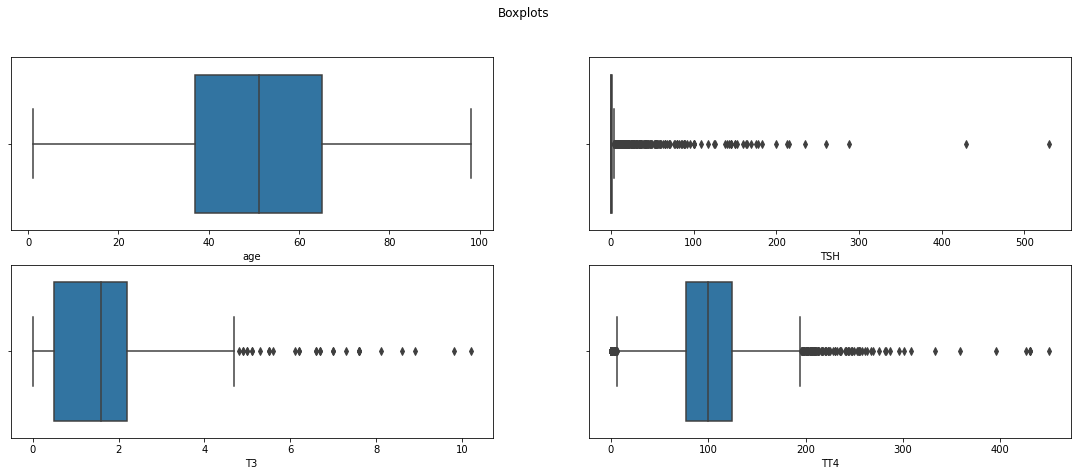

In [34]:
# Checking for outliers
#
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(19, 7))
fig.suptitle('Boxplots')
sb.boxplot(df['age'], ax=ax1)
sb.boxplot(df['TSH'], ax=ax2)
sb.boxplot(df['T3'], ax=ax3)
sb.boxplot(df['TT4'], ax=ax4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

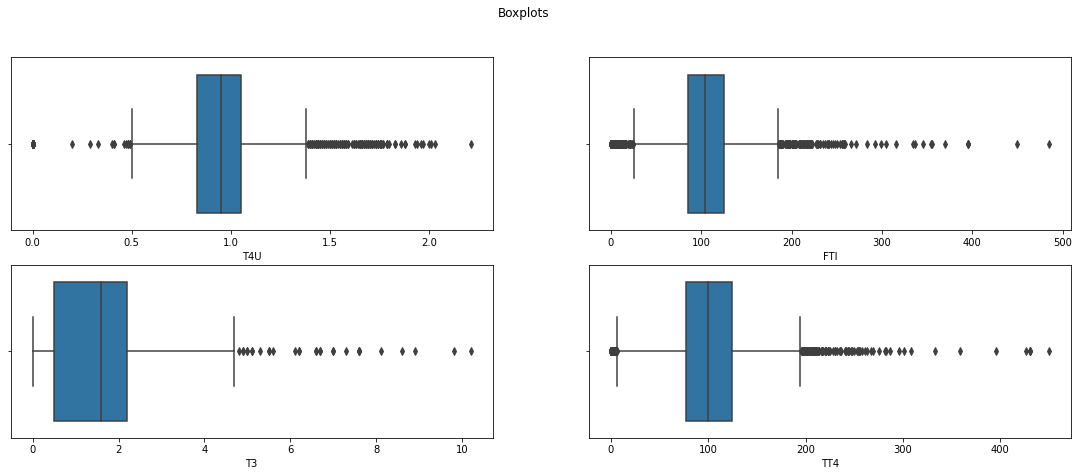

In [35]:
# More data cleaning procedures
#
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(19, 7))
fig.suptitle('Boxplots')
sb.boxplot(df['T4U'], ax=ax1)
sb.boxplot(df['FTI'], ax=ax2)
sb.boxplot(df['T3'], ax=ax3)
sb.boxplot(df['TT4'], ax=ax4)

## 6. EXPLORATORY DATA ANALYSIS

# UNIVARIATE ANALYSIS

### Categorical variable

In [36]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

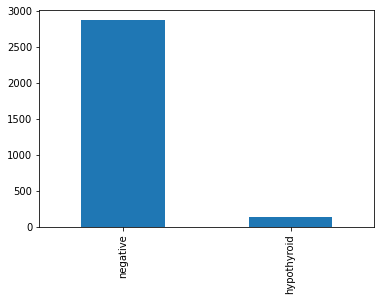

<Figure size 1008x648 with 0 Axes>

In [37]:
df['status'].value_counts().plot(kind='bar')
fig=plt.figure(figsize=(14,9))
plt.show()

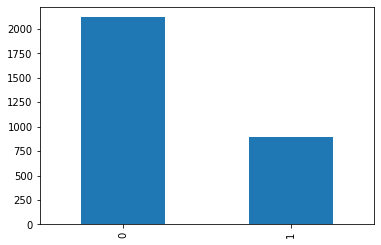

In [38]:
df['sex'].value_counts().plot(kind='bar')

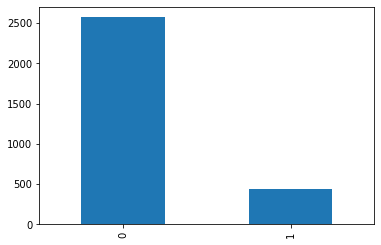

In [39]:
df['on_thyroxine'].value_counts().plot(kind='bar')

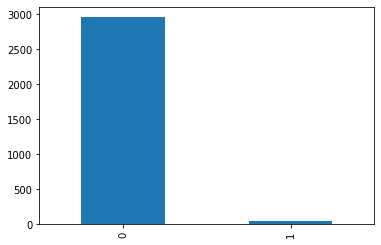

In [40]:
df['query_on_thyroxine'].value_counts().plot(kind='bar')

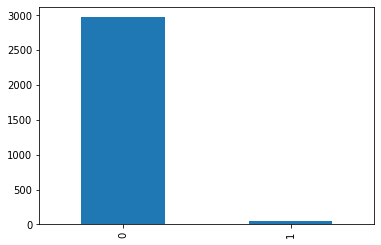

In [41]:
df['on_antithyroid_medication'].value_counts().plot(kind='bar')

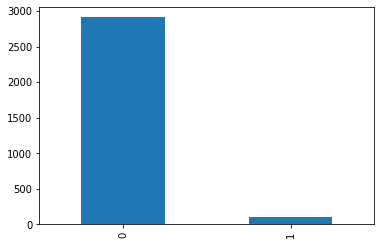

In [42]:
df['thyroid_surgery'].value_counts().plot(kind='bar')

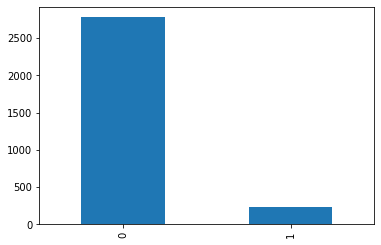

In [43]:
df['query_hypothyroid'].value_counts().plot(kind='bar')

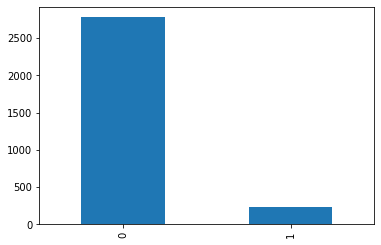

In [44]:
df['query_hyperthyroid'].value_counts().plot(kind='bar')

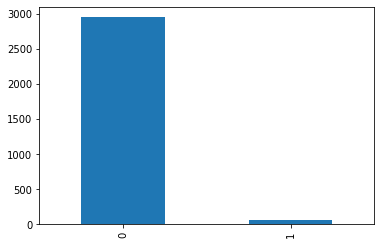

In [45]:
df['pregnant'].value_counts().plot(kind='bar')

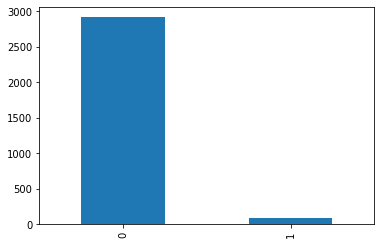

In [46]:
df['sick'].value_counts().plot(kind='bar')

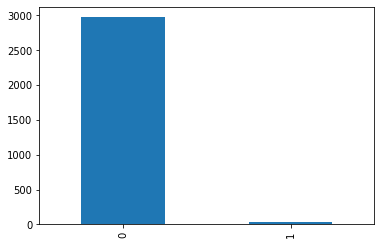

In [47]:
df['tumor'].value_counts().plot(kind='bar')

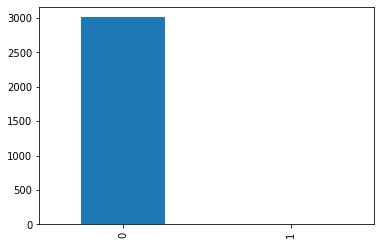

In [48]:
df['lithium'].value_counts().plot(kind='bar')

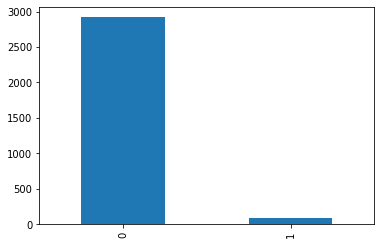

In [49]:
df['goitre'].value_counts().plot(kind='bar')

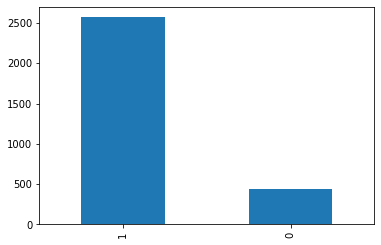

In [50]:
df['TSH_measured'].value_counts().plot(kind='bar')

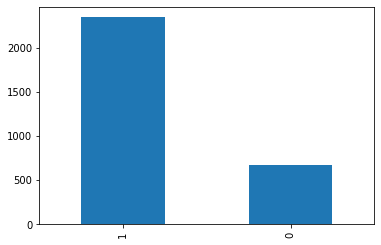

In [51]:
df['T3_measured'].value_counts().plot(kind='bar')

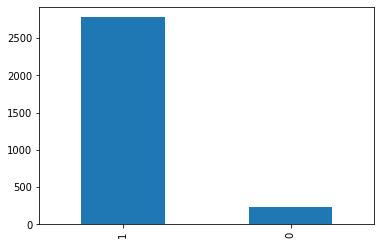

In [52]:
df['TT4_measured'].value_counts().plot(kind='bar')

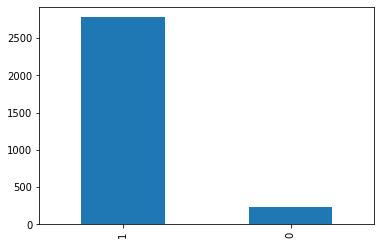

In [53]:
df['T4U_measured'].value_counts().plot(kind='bar')

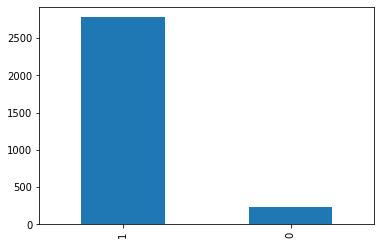

In [54]:
df['FTI_measured'].value_counts().plot(kind='bar')

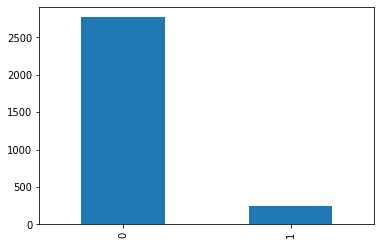

In [55]:
df['TBG_measured'].value_counts().plot(kind='bar')

### Numerical Variables

Measure of Central Tendency(mean,mode,median)

In [56]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [57]:
#getting the measure of central tendency and Standard deviation together with variance of age
mean = df["age"].mean()
median = df["age"].median()
mode = df["age"].mode()
std = df["age"].std()
var = df["age"].var()
max = df["age"].max()
min = df["age"].min()
range = max - min
quantile = df["age"].quantile([0.25,0.5,0.75])
print('The mean of age  is',mean)
print('The median of age is',median)
print('The mode of age is',mode)
print('The standard deviation of age is',std)
print('The variance of age is',var)
print('The Range of age  is',range)
print('The quantile of age is',quantile)

The mean of age  is 51.17977955150156
The median of age is 51.17977955150133
The mode of age is 0    51.17978
dtype: float64
The standard deviation of age is 18.018950886769375
The variance of age is 324.68259105980684
The Range of age  is 97.0
The quantile of age is 0.25    37.00000
0.50    51.17978
0.75    65.00000
Name: age, dtype: float64


In [58]:
#getting the measure of central tendency and Standard deviation together with variance of TSH
mean = df["TSH"].mean()
median = df["TSH"].median()
mode = df["TSH"].mode()
std = df["TSH"].std()
var = df["TSH"].var()
max = df["TSH"].max()
min = df["TSH"].min()
range = max - min
quantile = df["TSH"].quantile([0.25,0.5,0.75])
print('The mean of TSH  is',mean)
print('The median of TSH is',median)
print('The mode of TSH is',mode)
print('The standard deviation TSH of is',std)
print('The variance of TSH is',var)
print('The Range of TSH is',range)
print('The quantile of TSH is',quantile)

The mean of TSH  is 4.96615997344839
The median of TSH is 0.4
The mode of TSH is 0    0.0
dtype: float64
The standard deviation TSH of is 22.519265537362394
The variance of TSH is 507.1173203422375
The Range of TSH is 530.0
The quantile of TSH is 0.25    0.0
0.50    0.4
0.75    1.7
Name: TSH, dtype: float64


In [59]:
#getting the measure of central tendency and Standard deviation together with variance of T3
mean = df["T3"].mean()
median = df["T3"].median()
mode = df["T3"].mode()
std = df["T3"].std()
var = df["T3"].var()
max = df["T3"].max()
min = df["T3"].min()
range = max - min

quantile = df["T3"].quantile([0.25,0.5,0.75])
print('The mean of T3 is',mean)
print('The median of T3 is',median)
print('The mode of T3 is',mode)
print('The standard deviation T3 of is',std)
print('The variance of T3 is',var)
print('The Range of T3 is',range)
print('The quantile of T3 is',quantile)

The mean of T3 is 1.4981413873216047
The median of T3 is 1.6
The mode of T3 is 0    0.0
dtype: float64
The standard deviation T3 of is 1.168656706053261
The variance of T3 is 1.3657584966032583
The Range of T3 is 10.2
The quantile of T3 is 0.25    0.5
0.50    1.6
0.75    2.2
Name: T3, dtype: float64


In [60]:
#getting the measure of central tendency and Standard deviation together with variance of TT4
mean = df["TT4"].mean()
median = df["TT4"].median()
mode = df["TT4"].mode()
std = df["TT4"].std()
var = df["TT4"].var()
max = df["TT4"].max()
min = df["TT4"].min()
range = max - min

quantile = df["TT4"].quantile([0.25,0.5,0.75])
print('The mean of TT4 is',mean)
print('The median of TT4 is',median)
print('The mode of TT4  is',mode)
print('The standard deviation TT4 of is',std)
print('The variance of TT4 is',var)
print('The Range of TT4 is',range)
print('The quantile of TT4 is',quantile)

The mean of TT4 is 99.8250580816462
The median of TT4 is 100.0
The mode of TT4  is 0    0.0
dtype: float64
The standard deviation TT4 of is 51.44413516814921
The variance of TT4 is 2646.4990431988062
The Range of TT4 is 450.0
The quantile of TT4 is 0.25     77.0
0.50    100.0
0.75    124.0
Name: TT4, dtype: float64


In [61]:
#getting the measure of central tendency and Standard deviation together with variance of TBG
mean = df["TBG"].mean()
median = df["TBG"].median()
mode = df["TBG"].mode()
std = df["TBG"].std()
var = df["TBG"].var()
max = df["TBG"].max()
min = df["TBG"].min()
range = max - min

quantile = df["TBG"].quantile([0.25,0.5,0.75])
print('The mean of TBG is',mean)
print('The median of TBG  is',median)
print('The mode of  TBG is',mode)
print('The standard deviation TBG of is',std)
print('The variance of TBG  is',var)
print('The Range of TBG is',range)
print('The quantile of TBG is',quantile)

The mean of TBG is 2.521274477265184
The median of TBG  is 0.0
The mode of  TBG is 0    0.0
dtype: float64
The standard deviation TBG of is 10.030383561515029
The variance of TBG  is 100.60859439111091
The Range of TBG is 122.0
The quantile of TBG is 0.25    0.0
0.50    0.0
0.75    0.0
Name: TBG, dtype: float64


In [62]:
#getting the measure of central tendency and Standard deviation together with variance of T4U
mean = df["T4U"].mean()
median = df["T4U"].median()
mode = df["T4U"].mode()
std = df["T4U"].std()
var = df["T4U"].var()
max = df["T4U"].max()
min = df["T4U"].min()
range = max - min

quantile = df["T4U"].quantile([0.25,0.5,0.75])
print('The mean of T4U is',mean)
print('The median of T4U is',median)
print('The mode of T4U  is',mode)
print('The standard deviation  T4U of is',std)
print('The variance of T4U is',var)
print('The Range of T4U is',range)
print('The quantile of T4U is',quantile)

The mean of T4U is 0.9082376369067365
The median of T4U is 0.95
The mode of T4U  is 0    0.0
dtype: float64
The standard deviation  T4U of is 0.3366169978936112
The variance of T4U is 0.11331100327090747
The Range of T4U is 2.21
The quantile of T4U is 0.25    0.83
0.50    0.95
0.75    1.05
Name: T4U, dtype: float64


In [63]:
#getting the measure of central tendency and Standard deviation together with variance of FTI
mean = df["FTI"].mean()
median = df["FTI"].median()
mode = df["FTI"].mode()
std = df["FTI"].std()
var = df["FTI"].var()
max = df["FTI"].max()
min = df["FTI"].min()
range = max - min

quantile = df["FTI"].quantile([0.25,0.5,0.75])
print('The mean of FTI is',mean)
print('The median of FTI is',median)
print('The mode of FTI  is',mode)
print('The standard deviation FTI of is',std)
print('The variance of FTI  is',var)
print('The Range of FTI is',range)
print('The quantile of FTI is',quantile)

The mean of FTI is 103.08526385662131
The median of FTI is 104.0
The mode of FTI  is 0    0.0
dtype: float64
The standard deviation FTI of is 50.53116162716006
The variance of FTI  is 2553.398295390173
The Range of FTI is 485.0
The quantile of FTI is 0.25     85.0
0.50    104.0
0.75    125.0
Name: FTI, dtype: float64


Skewness AND Kurtosis

In [64]:
kurt1 = df['age'].kurt()
print("The kurtosis for the age  is: ", kurt1)
if kurt1 > 0:
  print("Leptokurtic")
elif kurt1 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt2 = df['T3'].kurt()
print("The kurtosis for the T3 is: ", kurt2)
if kurt2 > 0:
  print("Leptokurtic")
elif kurt2 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt3 = df['TT4'].kurt()
print("The kurtosis for the TT4 is: ", kurt3)
if kurt3 > 0:
  print("Leptokurtic")
elif kurt3 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt4 = df['T4U'].kurt()
print("The kurtosis for the T4U is: ", kurt4)
if kurt4 > 0:
  print("Leptokurtic")
elif kurt4 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

The kurtosis for the age  is:  -0.6632877587094792
Platykurtic


The kurtosis for the T3 is:  4.442325306260354
Leptokurtic


The kurtosis for the TT4 is:  3.9546199315645434
Leptokurtic


The kurtosis for the T4U is:  2.598154676972858
Leptokurtic




In [65]:
kurt1 = df['TSH'].kurt()
print("The kurtosis for the TSH  is: ", kurt1)
if kurt1 > 0:
  print("Leptokurtic")
elif kurt1 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt2 = df['TBG'].kurt()
print("The kurtosis for the TBG is: ", kurt2)
if kurt2 > 0:
  print("Leptokurtic")
elif kurt2 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

kurt3 = df['FTI'].kurt()
print("The kurtosis for the FTI is: ", kurt3)
if kurt3 > 0:
  print("Leptokurtic")
elif kurt3 < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 



The kurtosis for the TSH  is:  175.76282121033503
Leptokurtic


The kurtosis for the TBG is:  46.89234565226632
Leptokurtic


The kurtosis for the FTI is:  4.402103594388915
Leptokurtic




In [66]:
# Skewness
skew1 = df['age'].skew()
print("The skewness for the age is: ", skew1)
if skew1 == 0:
  print("The distribution is symmetrical")
elif skew1 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew2 = df['T3'].skew()
print("The skewness for the T3 is: ", skew2)
if skew2 == 0:
  print("The distribution is symmetrical")
elif skew2 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew3 = df['TT4'].skew()
print("The skewness for the TT4 is: ", skew3)
if skew3 == 0:
  print("The distribution is symmetrical")
elif skew3 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew4 = df['T4U'].skew()
print("The skewness for the T4U is: ", skew4)
if skew4 == 0:
  print("The distribution is symmetrical")
elif skew4 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness for the age is:  -0.1858590217864167
The distribution is negatively skewed


The skewness for the T3 is:  1.0888077233737727
The distribution is positively skewed


The skewness for the TT4 is:  0.6440373606809809
The distribution is positively skewed


The skewness for the T4U is:  -0.936460000775191
The distribution is negatively skewed




In [67]:
# Skewness
skew1 = df['FTI'].skew()
print("The skewness for the FTI is: ", skew1)
if skew1 == 0:
  print("The distribution is symmetrical")
elif skew1 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew2 = df['TBG'].skew()
print("The skewness for the TBG is: ", skew2)
if skew2 == 0:
  print("The distribution is symmetrical")
elif skew2 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

skew3 = df['TSH'].skew()
print("The skewness for the TSH is: ", skew3)
if skew3 == 0:
  print("The distribution is symmetrical")
elif skew3 > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')



The skewness for the FTI is:  0.5203080847269788
The distribution is positively skewed


The skewness for the TBG is:  5.863620391726905
The distribution is positively skewed


The skewness for the TSH is:  11.017626121743522
The distribution is positively skewed




# BIVARIATE ANALYSIS

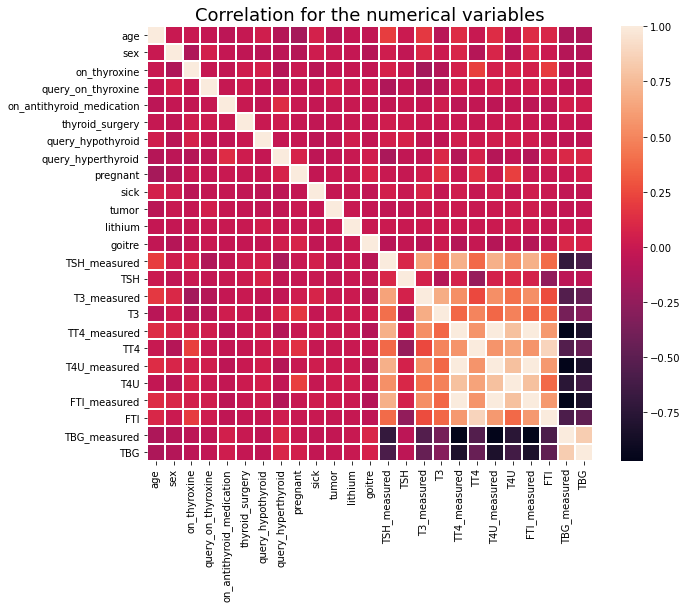

In [68]:
#finding correlation between variables in our dataset
corr = df.corr()
plt.figure(figsize=(10,8))
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=1.0,annot=False)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

In [69]:
#correlation matrix
df1=df.iloc[: , -12:]
df1

,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3158,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0,0.0
3159,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0,0.0
3160,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0,0.0
3161,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0,0.0


In [70]:
df1= df1.corr()
df1

,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
TSH_measured,1.000000,0.091574,0.631240,0.402384,0.697044,0.381225,0.695420,0.547651,0.693792,0.387469,-0.701058,-0.585537
TSH,0.091574,1.000000,0.062356,-0.088855,0.064151,-0.225530,0.064003,0.098502,0.063855,-0.247392,-0.059403,-0.050292
T3_measured,0.631240,0.062356,1.000000,0.684313,0.541963,0.252044,0.540699,0.410301,0.539433,0.266749,-0.544069,-0.453991
T3,0.402384,-0.088855,0.684313,1.000000,0.371640,0.495383,0.370777,0.477404,0.369912,0.371992,-0.373480,-0.303113
TT4_measured,0.697044,0.064151,0.541963,0.371640,1.000000,0.564474,0.997691,0.780614,0.995377,0.589594,-0.966410,-0.815106
TT4,0.381225,-0.225530,0.252044,0.495383,0.564474,1.000000,0.563170,0.631146,0.561864,0.879940,-0.542120,-0.444659
T4U_measured,0.695420,0.064003,0.540699,0.370777,0.997691,0.563170,1.000000,0.783067,0.997681,0.590425,-0.968668,-0.817011
T4U,0.547651,0.098502,0.410301,0.477404,0.780614,0.631146,0.783067,1.000000,0.781252,0.376514,-0.754792,-0.626725
FTI_measured,0.693792,0.063855,0.539433,0.369912,0.995377,0.561864,0.997681,0.781252,1.000000,0.590697,-0.970940,-0.818927
FTI,0.387469,-0.247392,0.266749,0.371992,0.589594,0.879940,0.590425,0.376514,0.590697,1.000000,-0.574742,-0.484208


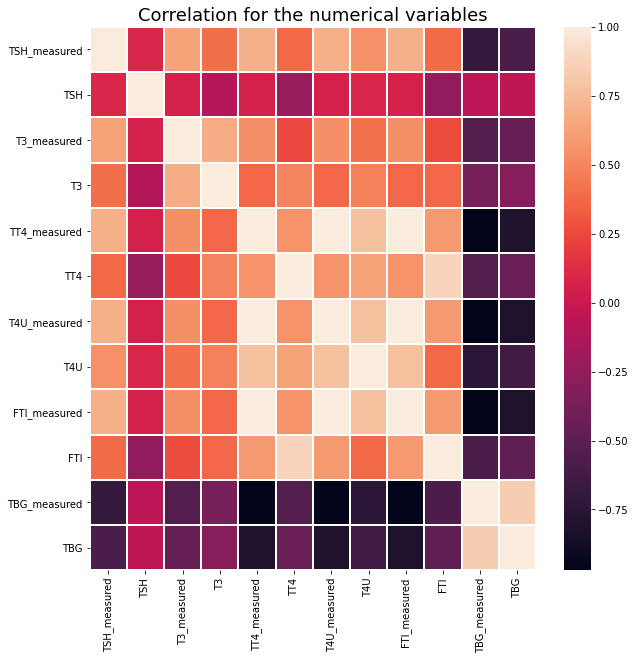

In [71]:
plt.figure(figsize=(10,10))
sb.heatmap(df1,xticklabels=df1.columns,yticklabels=df1.columns,linewidth=1.0,annot=False)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

## MULTIVARIATE ANALYSIS

In [72]:
# Separating our target label (type) from the other Xures
X = df.drop('status', 1)
y = df['status']
# Subject our Xures to LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [ ]:
# Create an instance of LDA
df_l = LDA()
df_l = LDA.fit(X, y)
df_l_X = LDA.transform(X)
#lda coefficients
df_l.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
important_features = pd.DataFrame(index=X.columns.values, data=df_l.coef_[0].T)
important_features.sort_values(0, ascending=False)

# 7.Implementing The Solution

## Random Forest Classifier

In [75]:
df['status']=labelencoder.fit_transform(df['status'])

In [76]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = df['status'].values
test_features = df.columns.to_list()
test_features.remove('status')
X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [77]:
#Import the model
from sklearn.ensemble import RandomForestClassifier
 #Train the model
forest = RandomForestClassifier(n_estimators=100,min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.988391376451078


In [78]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9913941480206541
Recall: 0.9965397923875432


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


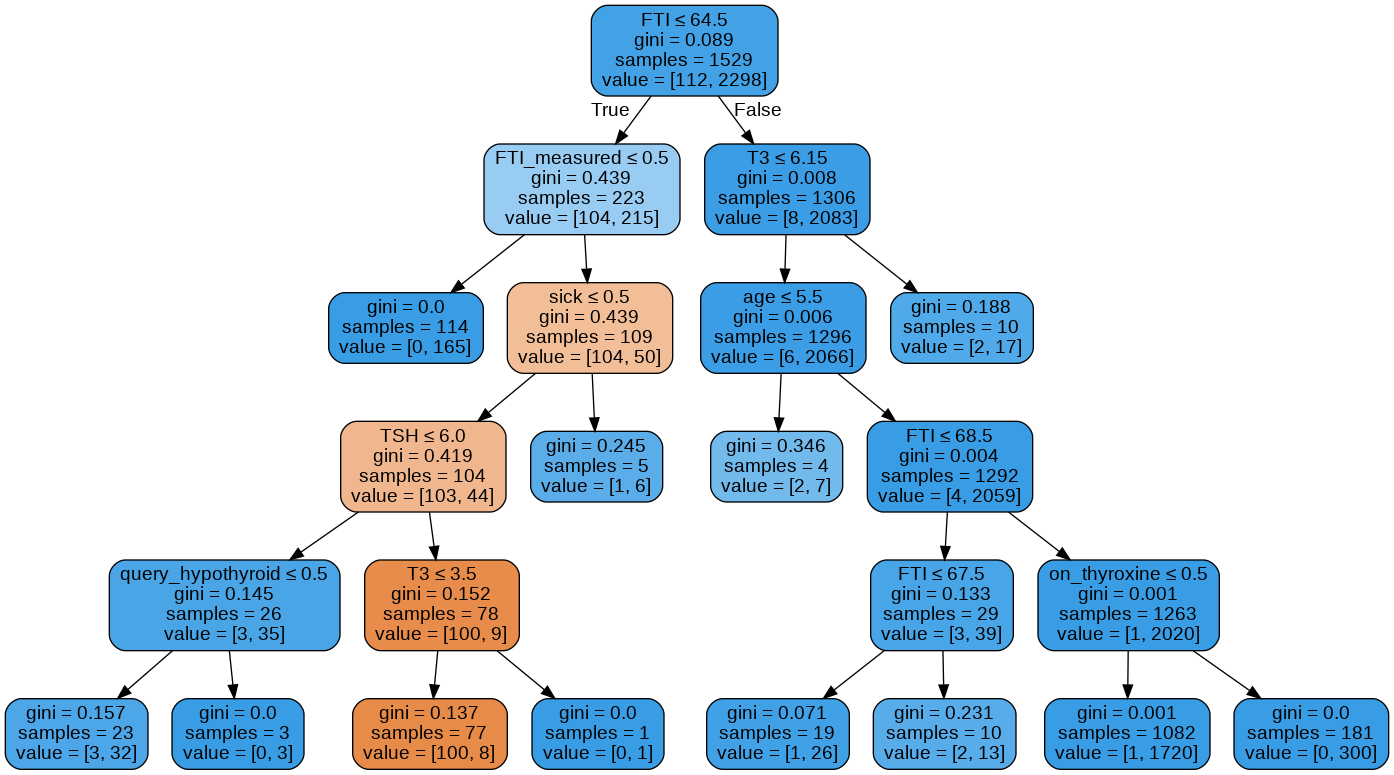

In [79]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[6]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypodf_forest.png')
Image(graph.create_png())

In [80]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]

print(feature_importances)
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0116), ('sex', 0.0015), ('on_thyroxine', 0.0045), ('query_on_thyroxine', 0.0002), ('on_antithyroid_medication', 0.0012), ('thyroid_surgery', 0.0017), ('query_hypothyroid', 0.0046), ('query_hyperthyroid', 0.0006), ('pregnant', 0.0002), ('sick', 0.003), ('tumor', 0.0005), ('lithium', 0.0), ('goitre', 0.0004), ('TSH_measured', 0.0077), ('TSH', 0.3655), ('T3_measured', 0.0091), ('T3', 0.0217), ('TT4_measured', 0.0265), ('TT4', 0.1846), ('T4U_measured', 0.0218), ('T4U', 0.038), ('FTI_measured', 0.0099), ('FTI', 0.2562), ('TBG_measured', 0.017), ('TBG', 0.0119)]

Variable: TSH                  Importance: 0.3655
Variable: FTI                  Importance: 0.2562
Variable: TT4                  Importance: 0.1846
Variable: T4U                  Importance: 0.038
Variable: TT4_measured         Importance: 0.0265
Variable: T4U_measured         Importance: 0.0218
Variable: T3                   Importance: 0.0217
Variable: TBG_measured         Importance: 0.017
Variable: TBG              

Conclusion

The features with the most importance were mostly TSH,FTI anf TT4 in most of 

our Trees in the Random Forest.

In this model we are going to focus on this two features to be able to predict if one had Hyperthyroid or is negative

##### Hyperparameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

parameters={'min_samples_split': np.linspace(0.1, 1, 10, endpoint=True),
            'max_depth' : np.arange(1, 10, 1)}
forest_grid = GridSearchCV(estimator=forest,param_grid=parameters,n_jobs=1,refit=True,cv=10 )
forest_grid = forest_grid.fit(X_train, y_train)
print("Random forest best parameters:", forest_grid.best_params_)

Random forest best parameters: {'max_depth': 8, 'min_samples_split': 0.1}


In [82]:
#Train the model using the new parameters
forest_grid= RandomForestClassifier(n_estimators=300,min_samples_split = 0.1, max_depth=9)
forest_grid = forest_grid.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_grid = forest_grid.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_grid))

Accuracy: 0.9834162520729685


### Conclusion

From our Random Forest classifier our metric accuracy was 98% which is quite good and we can therefore say our classifier is accurate.


Our Hyperparameter tuning was set to a maximumdepth of 9
Minsample split 0.1






In [86]:
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

## GRADIENT BOOST

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=5)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X)

y_pred_gbc


array([0, 0, 0, ..., 1, 1, 1])

In [108]:
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9834162520729685

Gradient Boosting works by sequentially adding predictors to an ensemble, each one
correcting its predecessor. However, instead of tweaking the instance weights at every
iteration like AdaBoost does, this method tries to fit the new predictor to the residual
errors made by the previous predictor.


Conclusion

# SUPPORT VECTOR CLASSIFIER

In [88]:
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


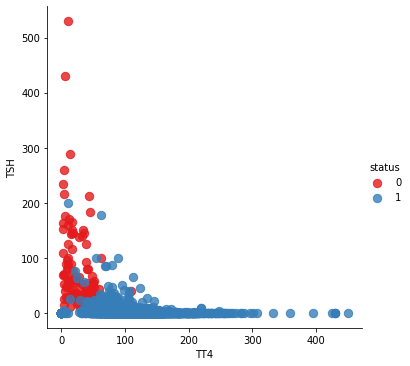

In [90]:
# Plotting our desired plots
sb.lmplot('TT4','TSH', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [91]:
# Specify the input for the model

TSH_TT4 = df[['TT4','TSH']].values

type_label = (df['status'])


# Fit the model
model = SVC(kernel= 'linear')
model.fit(TSH_TT4, type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
w = model.coef_[0] #get the first coefficient of our model
w

array([ 0.00934957, -0.03849678])

In [93]:
a = -w[0] / w[1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


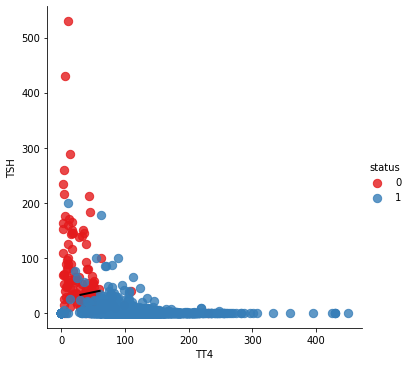

In [94]:
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sb.lmplot('TT4', 'TSH', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


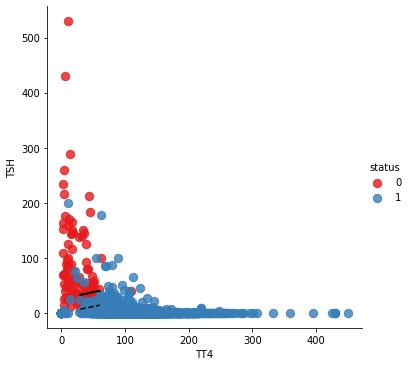

In [95]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sb.lmplot('TT4','TSH', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') #'k--' indicates that we want to draw a black dotted line
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=80, facecolors='none');

## Polynomial SVC

In [96]:
# Implementing the Solution
# 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC,LinearSVC
model1 = SVC(kernel="poly", degree=3, coef0=1, C=5)


In [97]:
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [98]:
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9834162520729685
[[ 19   6]
 [  4 574]]


### RADIAL BASIS FUNCTION 

In [99]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9834162520729685
[[ 19   6]
 [  4 574]]


## 8. Challenging the solution

Evaluation of our model

For Challenging the solution we are going to pick 2 values of TSH AND TT4 and 

see if our model can correctly predict if it is Negative or has Hypothyroid.Lets have our values as below

(TSH(530),TT4(7)






In [101]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0


In [102]:
df.shape

(3013, 26)

In [103]:
# Specify the input for the model

TSH_TT4 = df[['TT4','TSH']].values

type_label = (df['status'])


# Fit the model
model = SVC(kernel= 'linear')
model.fit(TSH_TT4, type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [104]:
Hyp_or_neg = model.predict([[7, 530]])
Hyp_or_neg

array([0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


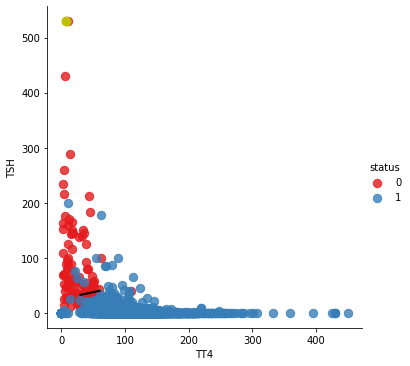

In [105]:

sb.lmplot('TT4', 'TSH', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(7, 530, 'yo', markersize='9');


The yellow plot is our point which we can clearly tell through the visualization that it belongs to Hypothyroid that is 0

In [106]:
# Now that we have created our model let's use it to make some predictions. Remember the output of our model can either be 0 or 1. 0 being a muffin and 1 being a cupcake as we set it in the type_label variable.
# Predict if 60 parts flour and 30 parts butter
# We can also go an exra mile to create a function that helps us predict when recipe is muffin or cupcake

def Hyp_or_neg (TT4, TSH):
    if(model.predict([[TT4, TSH]]))==0:
        print('You\'re looking at a presence of Hyperthyroid!')
    else:
        print('You\'re looking at negative for Hyperthyroid!')

# Predict if 7 parts TT4 and 530 parts of TSH
Hyp_or_neg(7, 530)

You're looking at a presence of Hyperthyroid!


## 9. Follow up questions

### a). Did we have the right data?

Yes i can confidently say we had enough data to make the most accurate predictions

### b). Do we need other data to answer our question?

No we do not need any more data.However we need more of the data description to 
be able to get an indepth explanations of our variables